<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-22 09:43:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  65.6MB/s    in 3.1s    

2025-03-22 09:44:00 (65.6 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


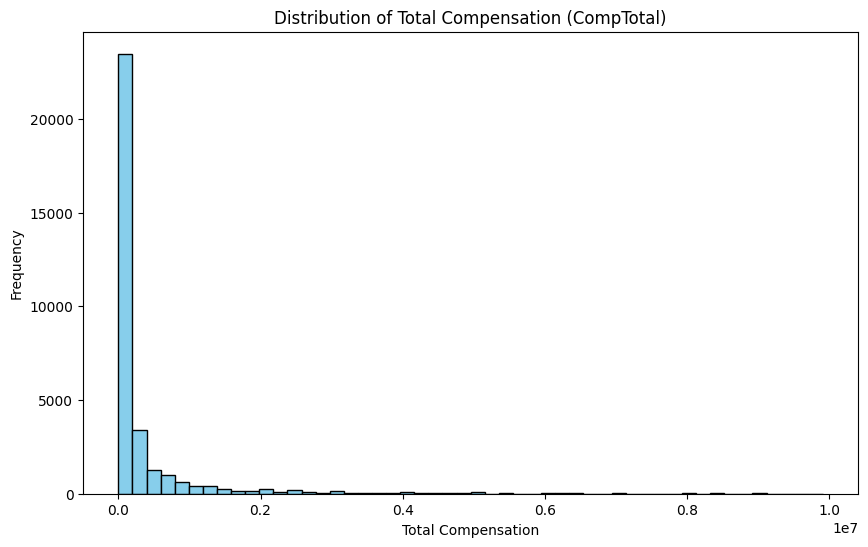

In [9]:
## Write your code here
# Query to get CompTotal data
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL AND CompTotal < 1e7  -- Limit extreme values for better visualization
"""
comp_total_df = pd.read_sql_query(QUERY, conn)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_total_df['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


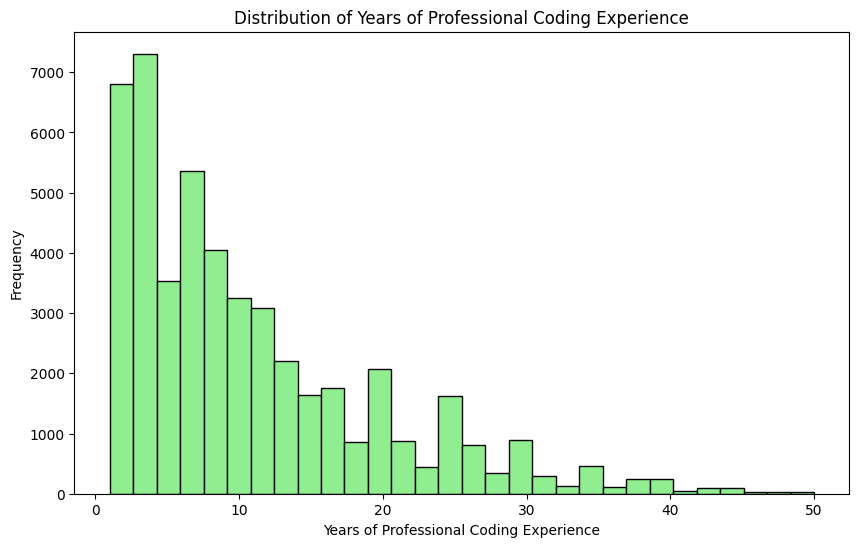

In [10]:
## Write your code here
# Query to get YearsCodePro data
QUERY = """
SELECT YearsCodePro 
FROM main 
WHERE YearsCodePro IS NOT NULL
"""
years_code_pro_df = pd.read_sql_query(QUERY, conn)

# Convert to numeric, coercing errors to NaN
years_code_pro_df['YearsCodePro'] = pd.to_numeric(years_code_pro_df['YearsCodePro'], errors='coerce')

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(years_code_pro_df['YearsCodePro'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


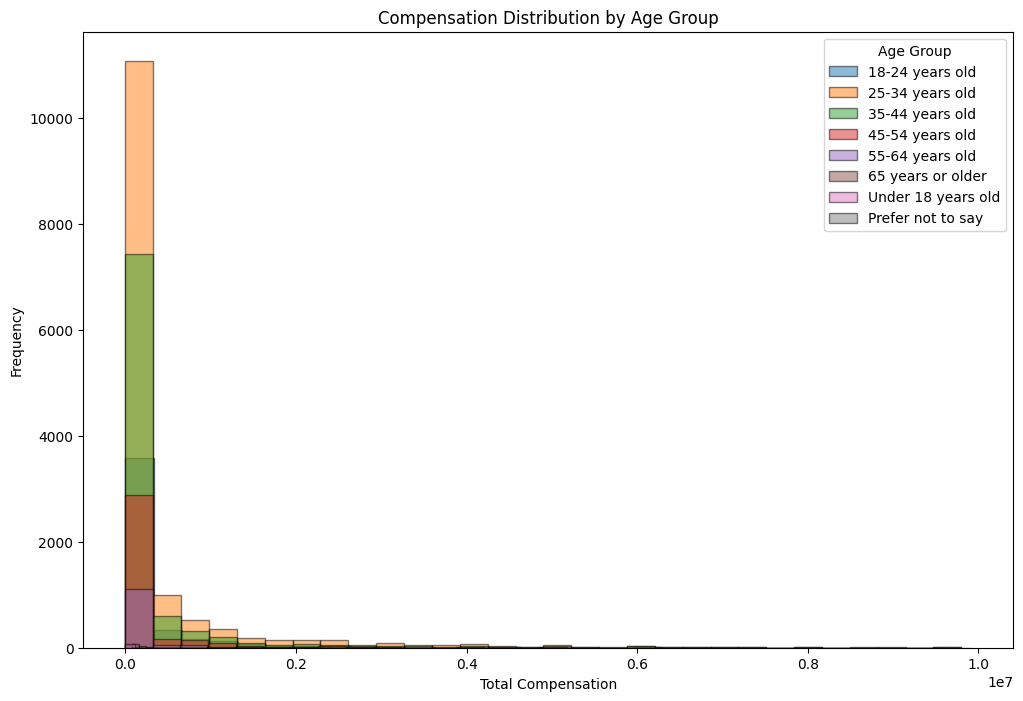

In [11]:
## Write your code here
# Query to get CompTotal and Age data
QUERY = """
SELECT Age, CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL AND CompTotal < 1e7
"""
comp_age_df = pd.read_sql_query(QUERY, conn)

# Plot histograms for each age group
plt.figure(figsize=(12, 8))
for age_group in comp_age_df['Age'].unique():
    subset = comp_age_df[comp_age_df['Age'] == age_group]['CompTotal']
    plt.hist(subset, bins=30, alpha=0.5, label=age_group, edgecolor='black')
plt.title('Compensation Distribution by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


/tmp/ipykernel_2326/6435153.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group')


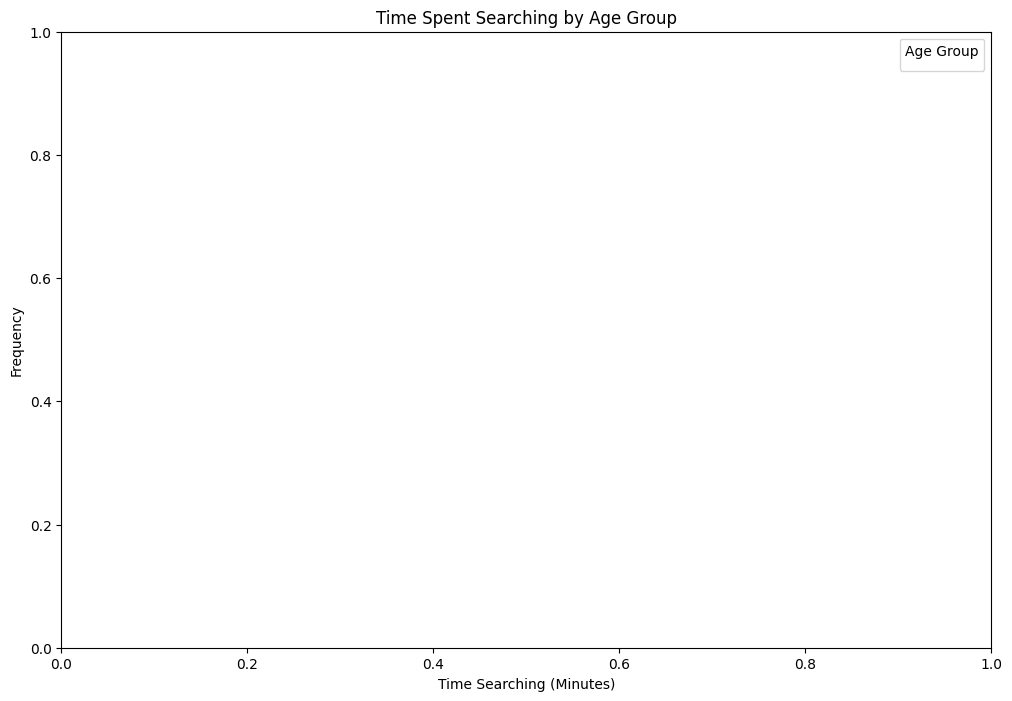

In [12]:
## Write your code here
# Query to get TimeSearching and Age data
QUERY = """
SELECT Age, TimeSearching 
FROM main 
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL
"""
time_search_df = pd.read_sql_query(QUERY, conn)

# Map TimeSearching to numeric values for plotting
time_map = {
    'Less than 15 minutes': 10, '15-30 minutes': 22.5, '30-60 minutes': 45,
    '1-2 hours': 90, '2-4 hours': 180, 'Over 4 hours': 300
}
time_search_df['TimeSearchingNum'] = time_search_df['TimeSearching'].map(time_map)

# Plot histograms for each age group
plt.figure(figsize=(12, 8))
for age_group in time_search_df['Age'].unique():
    subset = time_search_df[time_search_df['Age'] == age_group]['TimeSearchingNum'].dropna()
    if not subset.empty:
        plt.hist(subset, bins=20, alpha=0.5, label=age_group, edgecolor='black')
plt.title('Time Spent Searching by Age Group')
plt.xlabel('Time Searching (Minutes)')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


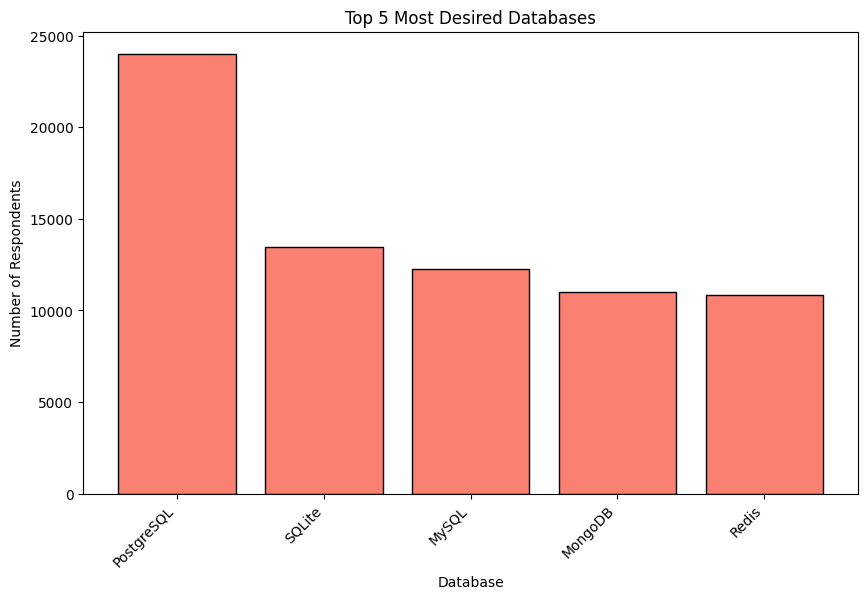

In [13]:
## Write your code here
# Query to get DatabaseWantToWorkWith data
QUERY = """
SELECT DatabaseWantToWorkWith 
FROM main 
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
db_df = pd.read_sql_query(QUERY, conn)

# Split and count databases
databases = db_df['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().value_counts()
top_5_databases = databases.head(5)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(top_5_databases.index, top_5_databases.values, color='salmon', edgecolor='black')
plt.title('Top 5 Most Desired Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


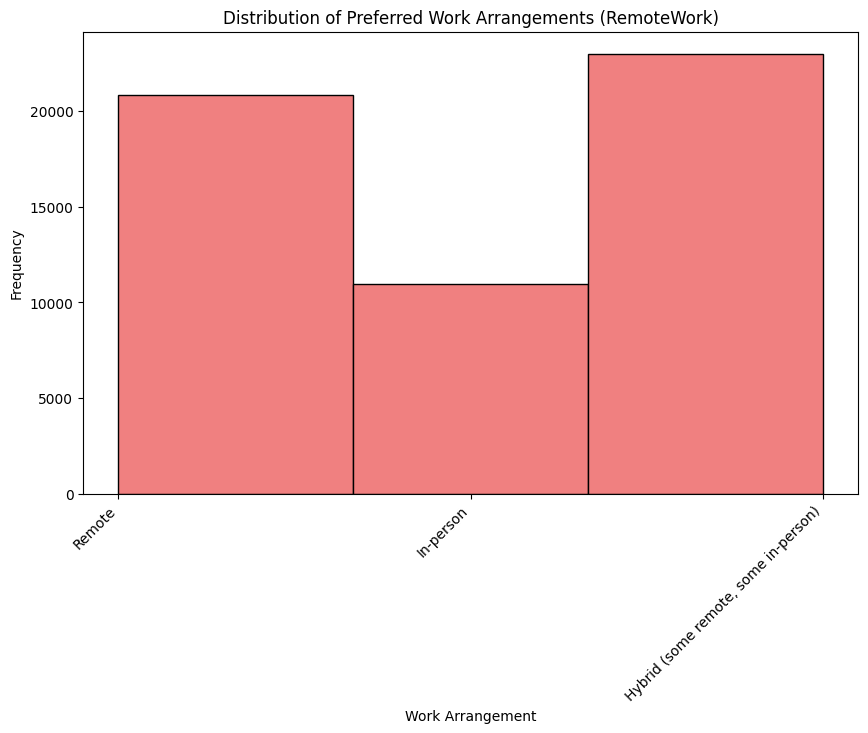

In [14]:
## Write your code here
# Query to get RemoteWork data
QUERY = """
SELECT RemoteWork 
FROM main 
WHERE RemoteWork IS NOT NULL
"""
remote_df = pd.read_sql_query(QUERY, conn)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(remote_df['RemoteWork'], bins=len(remote_df['RemoteWork'].unique()), 
         color='lightcoral', edgecolor='black')
plt.title('Distribution of Preferred Work Arrangements (RemoteWork)')
plt.xlabel('Work Arrangement')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


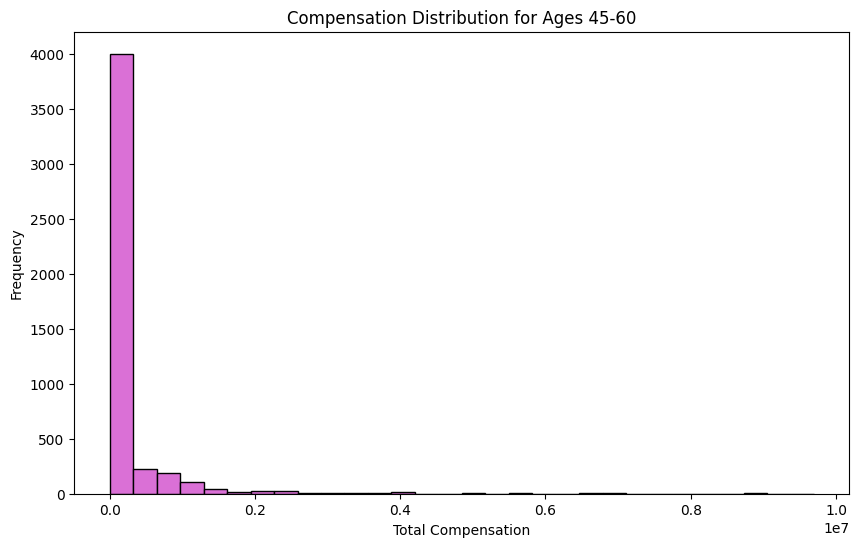

In [15]:
## Write your code here
# Query for CompTotal for ages 45-60
QUERY = """
SELECT CompTotal 
FROM main 
WHERE Age IN ('45-54 years old', '55-64 years old') 
AND CompTotal IS NOT NULL AND CompTotal < 1e7
"""
comp_45_60_df = pd.read_sql_query(QUERY, conn)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_45_60_df['CompTotal'], bins=30, color='orchid', edgecolor='black')
plt.title('Compensation Distribution for Ages 45-60')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


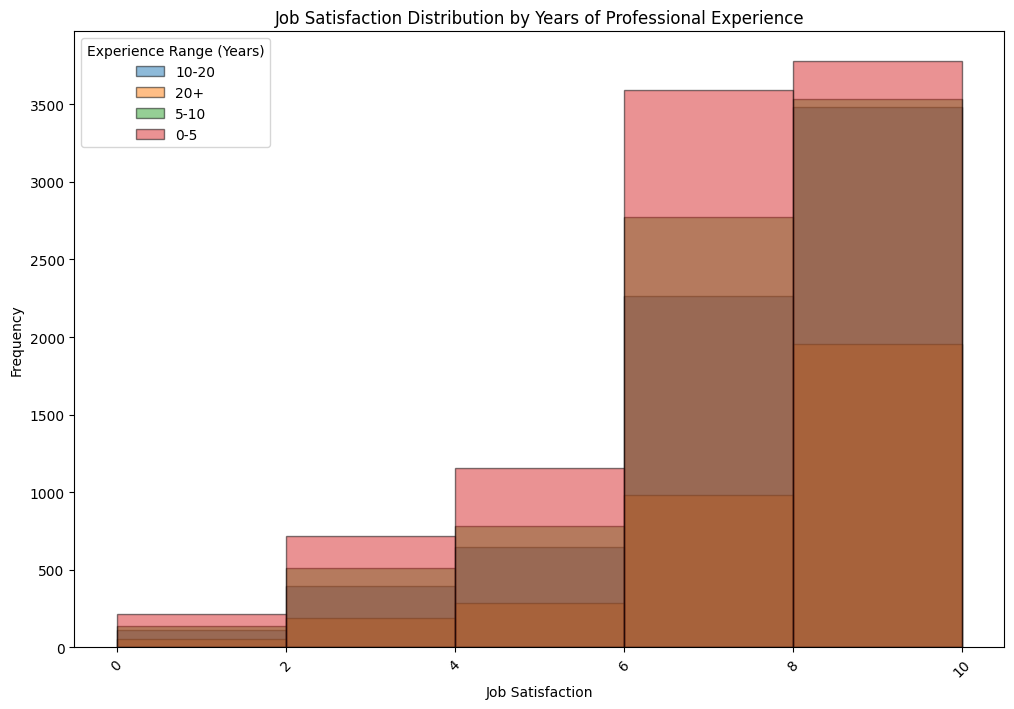

In [16]:
## Write your code here
# Query for JobSat and YearsCodePro
QUERY = """
SELECT JobSat, YearsCodePro 
FROM main 
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
jobsat_df = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro to numeric
jobsat_df['YearsCodePro'] = pd.to_numeric(jobsat_df['YearsCodePro'], errors='coerce')

# Bin YearsCodePro for better grouping
bins = [0, 5, 10, 20, 50]
labels = ['0-5', '5-10', '10-20', '20+']
jobsat_df['ExperienceRange'] = pd.cut(jobsat_df['YearsCodePro'], bins=bins, labels=labels)

# Plot histograms for each experience range
plt.figure(figsize=(12, 8))
for exp_range in jobsat_df['ExperienceRange'].unique():
    if pd.notna(exp_range):
        subset = jobsat_df[jobsat_df['ExperienceRange'] == exp_range]['JobSat']
        plt.hist(subset, bins=5, alpha=0.5, label=exp_range, edgecolor='black')
plt.title('Job Satisfaction Distribution by Years of Professional Experience')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.legend(title='Experience Range (Years)')
plt.xticks(rotation=45)
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [17]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
